# Import Required Libraries and Load + Get Basic Information of The Data

## Import Required Libraries and Load Data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('university_students_with_outliers.csv')

## Analyze and Get Basic Information of The Data

In [44]:
df.head()

,Age,Gender,Major,Hours on Social Media,Friends/Followers,Social Media Platform,Posting Frequency,Academic Performance
0,25,Female,Computer Science,7.2,336,Instagram,Rarely,Average
1,23,Male,NaN,7.1,945,Twitter,Rarely,Average
2,21,Male,Business,0.0,1411,Snapchat,Never,Good
3,25,Female,IT,7.7,1359,LinkedIn,Rarely,Poor
4,20,Female,NaN,7.1,924,Instagram,Rarely,Poor


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    219 non-null    int64  
 1   Gender                 208 non-null    object 
 2   Major                  197 non-null    object 
 3   Hours on Social Media  219 non-null    float64
 4   Friends/Followers      219 non-null    int64  
 5   Social Media Platform  215 non-null    object 
 6   Posting Frequency      210 non-null    object 
 7   Academic Performance   211 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 13.8+ KB


Missing Data Count: 
Age                       0
Gender                   11
Major                    22
Hours on Social Media     0
Friends/Followers         0
Social Media Platform     4
Posting Frequency         9
Academic Performance      8
dtype: int64


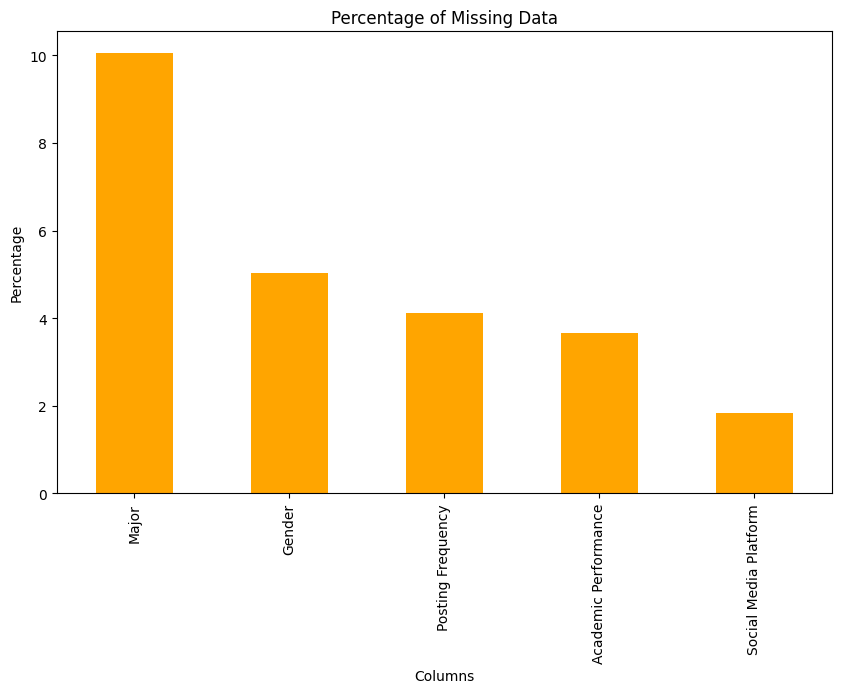

In [46]:
print("Missing Data Count: ")
print(df.isnull().sum())
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='orange')
plt.title("Percentage of Missing Data")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()


It is seen that there are some missing datas present in the dataset which are of Major,Gender,Posting Frequency, Academic Performance and Social Media Platform columns. We will fill these missing values with the most frequent value in the column.

# Preprocessing

## Handle Missing Data

In [47]:
categorical_columns = ['Major','Gender','Social Media Platform']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
ordinal_columns = ['Posting Frequency', 'Academic Performance']
for col in ordinal_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

Missing datas are being filled up by imputed values.

In [48]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0
Number of duplicate rows: 0


There are no duplicate rows in the dataset.

In [49]:
df.dropna(inplace=True)
df.isnull().sum()

Age                      0
Gender                   0
Major                    0
Hours on Social Media    0
Friends/Followers        0
Social Media Platform    0
Posting Frequency        0
Academic Performance     0
dtype: int64

Final checking all null values are imputed.

In [50]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    219 non-null    int64  
 1   gender                 219 non-null    object 
 2   major                  219 non-null    object 
 3   hours_on_social_media  219 non-null    float64
 4   friends/followers      219 non-null    int64  
 5   social_media_platform  219 non-null    object 
 6   posting_frequency      219 non-null    object 
 7   academic_performance   219 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 13.8+ KB


the above code is written to convert names in smaller case letters and also join them using underscore.

## Handling outliers

In [51]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#df = remove_outliers(df, 'friends/followers')


In [52]:
fig2 = px.box(df, y='friends/followers', title='Boxplot of Friends/Followers')
fig2.show()

 not removing the 4 outliers for further analysis

# Univariate Analysis

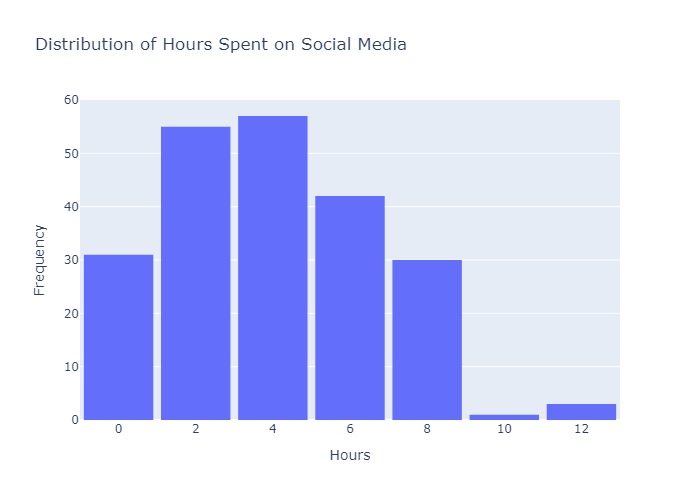

In [53]:
fig = px.histogram(df, x='hours_on_social_media', nbins=10, title='Distribution of Hours Spent on Social Media')
fig.update_layout(xaxis_title='Hours', yaxis_title='Frequency',bargap=0.1)
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


Most of the people spend 0-8 hours on social media. among which highest amount of people spend 3-5 hours on social media. 2nd highest is 1-2.9 hours. and 3rd highest is 5-6.9 hours respectively. THere are very much less peoples who use excessive social media greater than or equal to 10 hours.

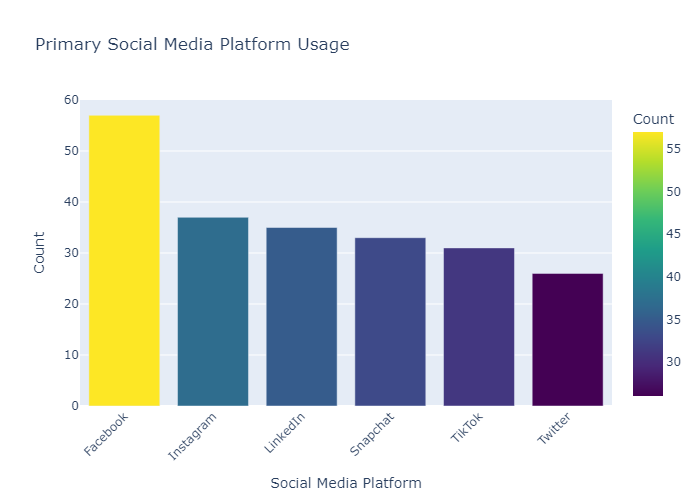

In [54]:
# Distribution of primary social media platforms
platform_counts = df['social_media_platform'].value_counts().reset_index()
platform_counts.columns = ['Social Media Platform', 'Count']

fig = px.bar(platform_counts,
              x='Social Media Platform', 
              y='Count', 
              title='Primary Social Media Platform Usage', 
              color='Count', 
              color_continuous_scale='viridis')

fig.update_layout(xaxis_title='Social Media Platform', 
                  yaxis_title='Count', 
                  xaxis_tickangle=-45)

#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


most of the people use Facebook(57 people) as their primary social media platform. followed by Instagram(37) and LinkedIn(35). The least used social media platform is Twitter(26).

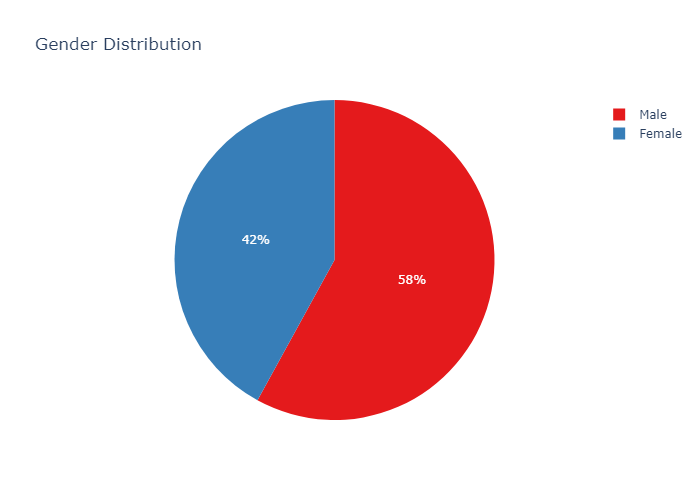

In [55]:
#Gender {'Male': 0, 'Female': 1}
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.pie(gender_counts,
             names='Gender', 
             values='Count', 
             title='Gender Distribution',
             color='Gender', 
             color_discrete_sequence=px.colors.qualitative.Set1)

#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


Here Gender class is not equally distributed. The majority of the students are male with 58% and the minority are female with 42%.

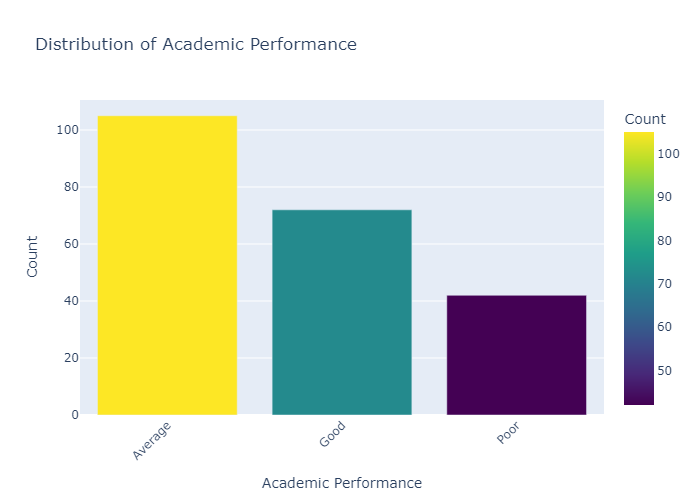

In [56]:
#Performance {1:good ,2: average, 3:poor}
performance_counts = df['academic_performance'].value_counts().reset_index()
performance_counts.columns = ['Academic Performance', 'Count']

fig = px.bar(performance_counts, 
              x='Academic Performance', 
              y='Count', 
              title='Distribution of Academic Performance', 
              color='Count', 
              color_continuous_scale='viridis')

fig.update_layout(xaxis_title='Academic Performance', 
                  yaxis_title='Count', 
                  xaxis_tickangle=-45)

#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


Most of the people have average academic performance with a count of 105 which is approximately 47.94% of the dataset. Least of them has poor academic performance with a count of 42 which is approximately 19.17% of the dataset. The good academic people are of 32.87% of the total people with a count of 72.

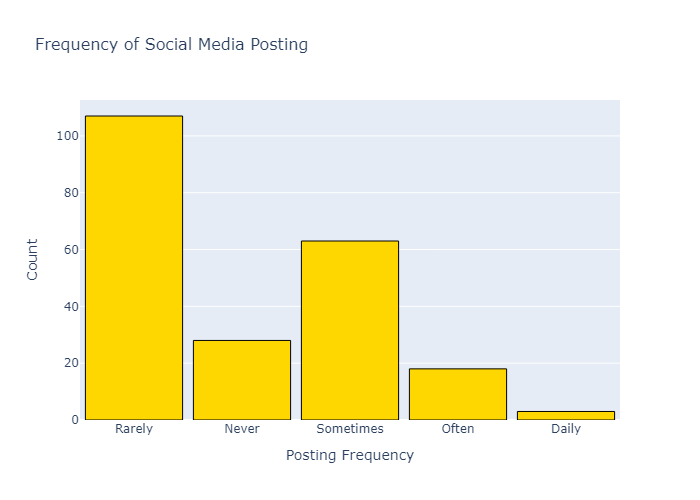

In [57]:
# posting_frequency distribution
# Never (0), Rarely (1), Sometimes (2), Often (3), Daily (4)
fig = px.histogram(df, x='posting_frequency', nbins=5, 
                   title="Frequency of Social Media Posting",
                   color_discrete_sequence=['gold','green'])

fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(xaxis_title="Posting Frequency",
                  yaxis_title="Count", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14),
                  bargap=0.1)

#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


Most of the people post rarely on socical media, with a count of 107 which is approximately 48.93% of the dataset. Least of them post daily on social media, with a count of 3 which is approximately 1.36% of the dataset. it is seen that people maximum post sometimes in social media and the persons with often and regular posts are less in number.

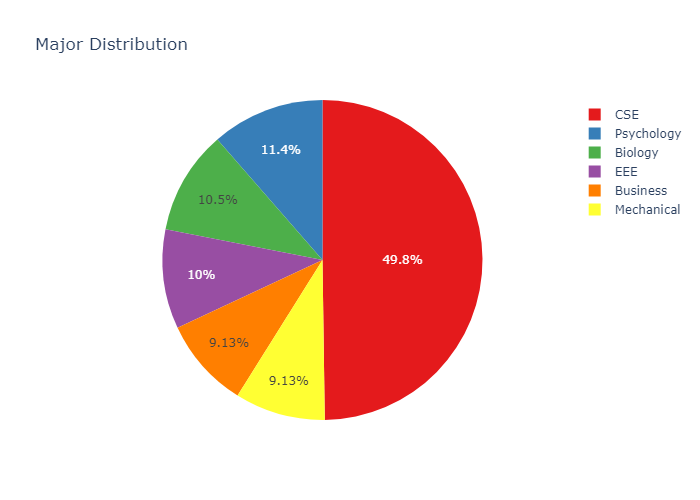

In [58]:
# Major Distribution
df['major'] = df['major'].replace({
    'CSE': 'CSE',
    'Computer Science': 'CSE',
    'Computer Science & Engineering': 'CSE',
    'IT': 'CSE'
})
major_counts = df['major'].value_counts().reset_index()
major_counts.columns = ['major', 'Count']

fig = px.pie(major_counts, 
             names='major', 
             values='Count', 
             title='Major Distribution',
             color='major', 
             color_discrete_sequence=px.colors.qualitative.Set1)

#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


Most people of the dataset belong to cse major almost half of the total records and least of them belong to mechanical(9.13%). 

## Bivariate Analysis

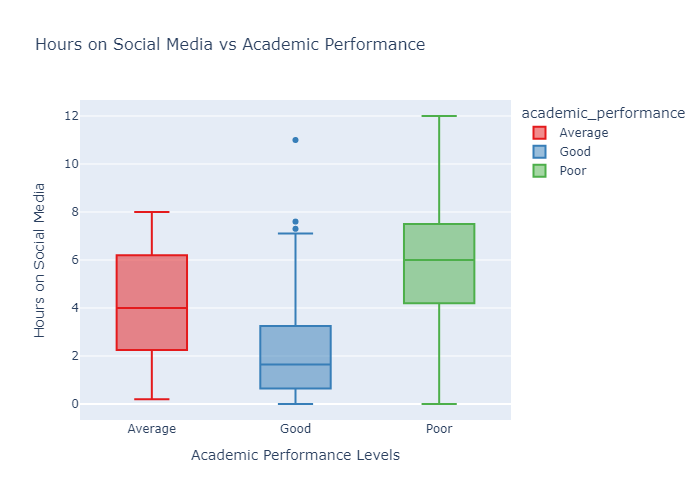

In [59]:
#Academic Performance vs Hours on Social Media
fig = px.box(df, x='academic_performance', y='hours_on_social_media', 
              title="Hours on Social Media vs Academic Performance",
              color='academic_performance', 
              color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis_title="Academic Performance Levels",
                  yaxis_title="Hours on Social Media", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14))

#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


This analysis is very, very interesting. It shows that people who spend more time on social media have lower academic performance. This could be due to the fact that social media can be a distraction and can take up a lot of time, which can be used for studying and other important activities. It is important for students to balance their social media usage with their academic responsibilities. To be specific the people with good academic result has a median of 1.65 hours on social media and the people with average academic result has a median of 4 hours and the people with bad academic result has a median of 6 hours on social media. However, there are some interesting observation is seen that there exists a few people with very good academic result who spend more than 7 hours on social media and there are also some people with bad academic result who spend less than 4 hours on social media. This shows that academic performance is not only determined by the amount of time spent on social media but also may depend on other factors such as study habits, time management skills and motivation etc.

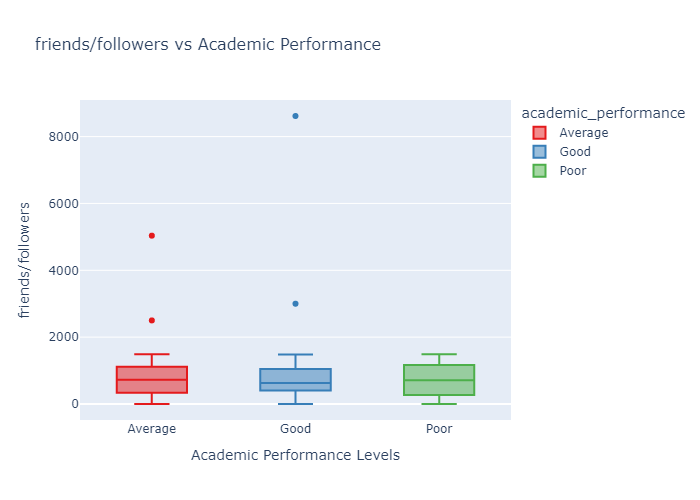

In [60]:
#Academic Performance vs number of friends on social media
fig = px.box(df, x='academic_performance', y='friends/followers', 
              title="friends/followers vs Academic Performance",
              color='academic_performance', 
              color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis_title="Academic Performance Levels",
                  yaxis_title="friends/followers", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14))
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


all classes have somewhat equal means in case of number of friends or followers in social media and it is not a good indicatior of the academic performance. Those who have good academic result have slightly low number of friends.

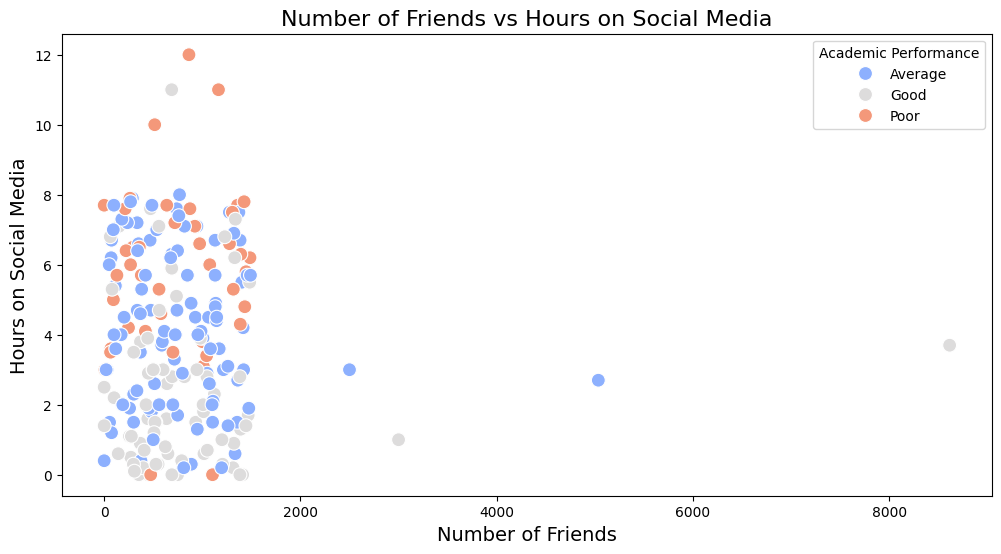

In [61]:
# Scatter Plot: Number of Friends vs Hours on Social Media
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='friends/followers', y='hours_on_social_media', hue='academic_performance', palette='coolwarm', s=100)
plt.title("Number of Friends vs Hours on Social Media", fontsize=16)
plt.xlabel("Number of Friends", fontsize=14)
plt.ylabel("Hours on Social Media", fontsize=14)
plt.legend(title='Academic Performance', loc='upper right')
plt.show()

This analysis is pretty confusing as the relationship of Number of Friends vs Hours on Social Media hued with academic performance is not clear. It is hard to tell whether the number of friends is a good or bad indicator of academic performance based on this plot. because most of the persons have number of friends between 0 and 1500 and hours on social media between 0 and 10. Another think to note is number of friend may be high but hours of social media can be low also the vice versa can exist. also it is seen that people can have many friends on social media platform but also do good academic result(noticed in some outliers).

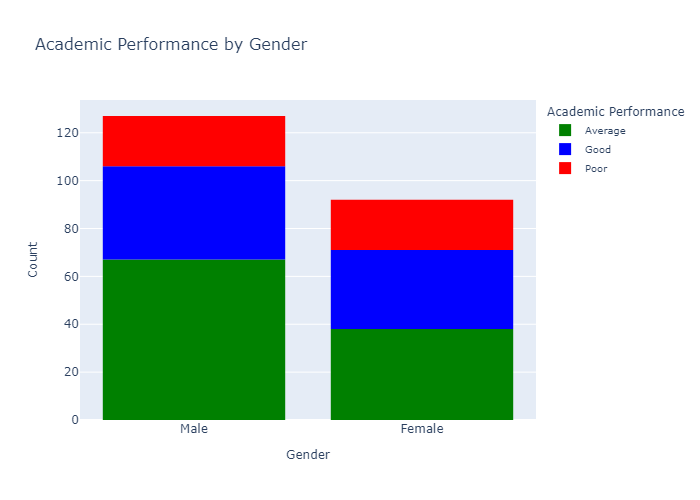

In [62]:
# Create a grouped bar chart to visualize academic performance by gender
fig = px.histogram(df, x='gender', color='academic_performance', 
                   title="Academic Performance by Gender",
                   color_discrete_sequence=["green","blue","red"],
                   category_orders={'gender': df['gender'].value_counts().index.tolist()})

fig.update_layout(xaxis_title="Gender",
                  yaxis_title="Count", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=12),
                  yaxis_title_font=dict(size=12),
                  legend_title_text="Academic Performance",
                  legend_title_font=dict(size=12),
                  legend_font=dict(size=10),
                  bargap=0.2)

#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


As male is more than female in this dataset i will measure the academic performance in percentage for both of them to analyze the scenario. approx 16% of the male have poor academic performance and 30% of the male have good academic performance. But 53% of the male has average academic performance. For female approx 22.5% have poor academic performance and approx 35.5% have good academic performance. But 41% of the female has average academic performance. so it can be infered that most of the male has tendency to do average result but the worst and best result percentage is more in case of female.

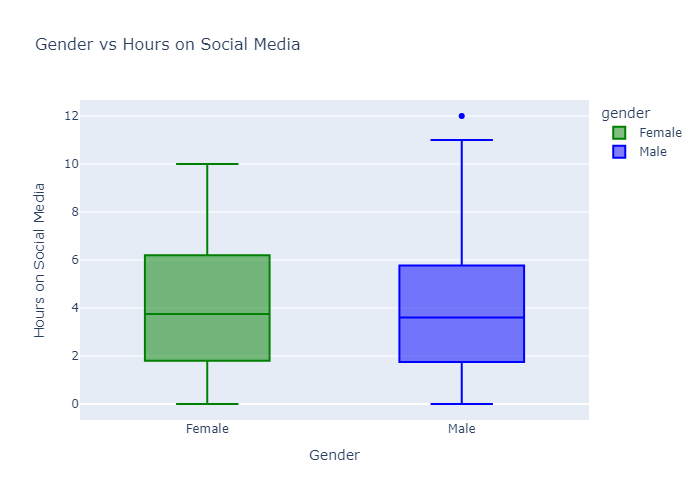

In [63]:
# 'gender' vs 'hours_on_social_media' 
fig = px.box(df, x='gender', y='hours_on_social_media', 
              title="Gender vs Hours on Social Media",
              color='gender', 
              color_discrete_sequence=["green","blue"])

fig.update_layout(xaxis_title="Gender",
                  yaxis_title="Hours on Social Media", 
                  title_font=dict(size=16),
                  xaxis_title_font=dict(size=14),
                  yaxis_title_font=dict(size=14))

#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


There is no significant difference between the hours spent on social media by male and female students. Both genders spend approximately the same amount of time on social media. But to state specifically the female students(3.75 hours) spend more time on social media than the male students(3.6 hours).

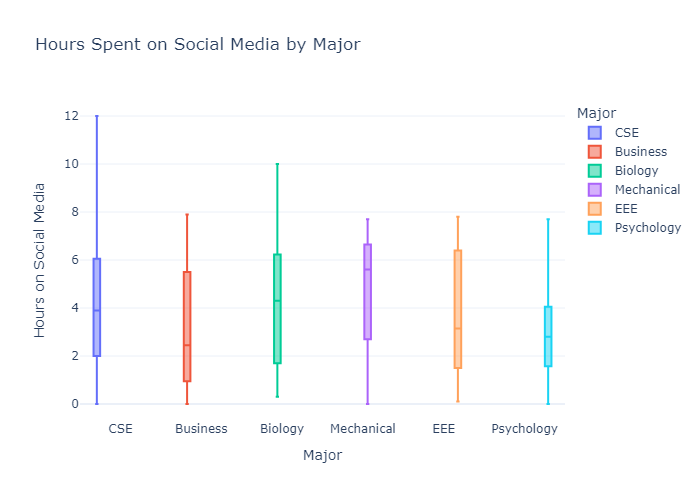

In [64]:
# Major vs Hours on Social Media plot
fig = px.box(df, x="major", y="hours_on_social_media", 
             title="Hours Spent on Social Media by Major",
             labels={"major": "Major", "hours_on_social_media": "Hours on Social Media"},
             color="major", 
             boxmode="group")
fig.update_layout(
    xaxis_title="Major",
    yaxis_title="Hours on Social Media",
    template="plotly_white"
)
#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


It is seen that Mechanical majors spend the most time on social media which is 5.6 hours in average. people who are from business major spend 2.45 hours on social media in average. The majority class i.e. cse majors spend 3.9 hours in social media in average.

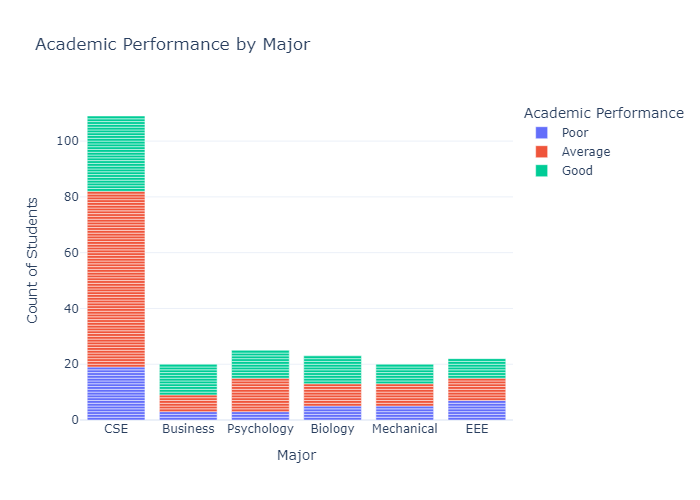

In [65]:
# Major vs Academic Performance plot
fig = px.bar(df, x="major", color="academic_performance", 
             title="Academic Performance by Major",
             labels={"major": "Major", "academic_performance": "Academic Performance"},
             category_orders={"academic_performance": ["Poor", "Average", "Good"]})

fig.update_layout(
    xaxis_title="Major",
    yaxis_title="Count of Students",
    template="plotly_white"
)

#fig.show()  #for notebook
fig.show("png") #for github it only supports non interactive


Significant amount of the cse majors have average academic performance. On the other hand in case of business and biology majors the amount of good academic performance is slightly higher than the average category.

# Multivariate Analysis


## Label Encoding

In [66]:
df_copy = df.copy()

posting_frequency_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Daily': 4}
df_copy['posting_frequency'] = df_copy['posting_frequency'].map(posting_frequency_mapping)

academic_performance_mapping = {'Good': 2, 'Average': 1, 'Poor': 0}
df_copy['academic_performance'] = df_copy['academic_performance'].map(academic_performance_mapping)

# gender_mapping = {'Male': 0, 'Female': 1} #as no other keeping them in one column
# df_copy['gender'] = df_copy['gender'].map(gender_mapping)
df_copy = pd.get_dummies(df_copy, columns=['gender', 'major', 'social_media_platform'])

scaler = StandardScaler()
columns_to_scale = ['age', 'hours_on_social_media', 'friends/followers','posting_frequency']
df_copy[columns_to_scale] = scaler.fit_transform(df_copy[columns_to_scale])

df_copy.head()

,age,hours_on_social_media,friends/followers,posting_frequency,academic_performance,gender_Female,gender_Male,major_Biology,major_Business,major_CSE,major_EEE,major_Mechanical,major_Psychology,social_media_platform_Facebook,social_media_platform_Instagram,social_media_platform_LinkedIn,social_media_platform_Snapchat,social_media_platform_TikTok,social_media_platform_Twitter
0,1.021216,1.279497,-0.578659,-0.426341,1,True,False,False,False,True,False,False,False,False,True,False,False,False,False
1,0.268198,1.240530,0.210966,-0.426341,1,False,True,False,False,True,False,False,False,False,False,False,False,False,True
2,-0.484820,-1.526109,0.815178,-1.593449,2,False,True,False,True,False,False,False,False,False,False,False,True,False,False
3,1.021216,1.474331,0.747755,-0.426341,0,True,False,False,False,True,False,False,False,False,False,True,False,False,False
4,-0.861328,1.240530,0.183737,-0.426341,0,True,False,False,False,True,False,False,False,False,True,False,False,False,False


## Correlation Matrix and Pairplot

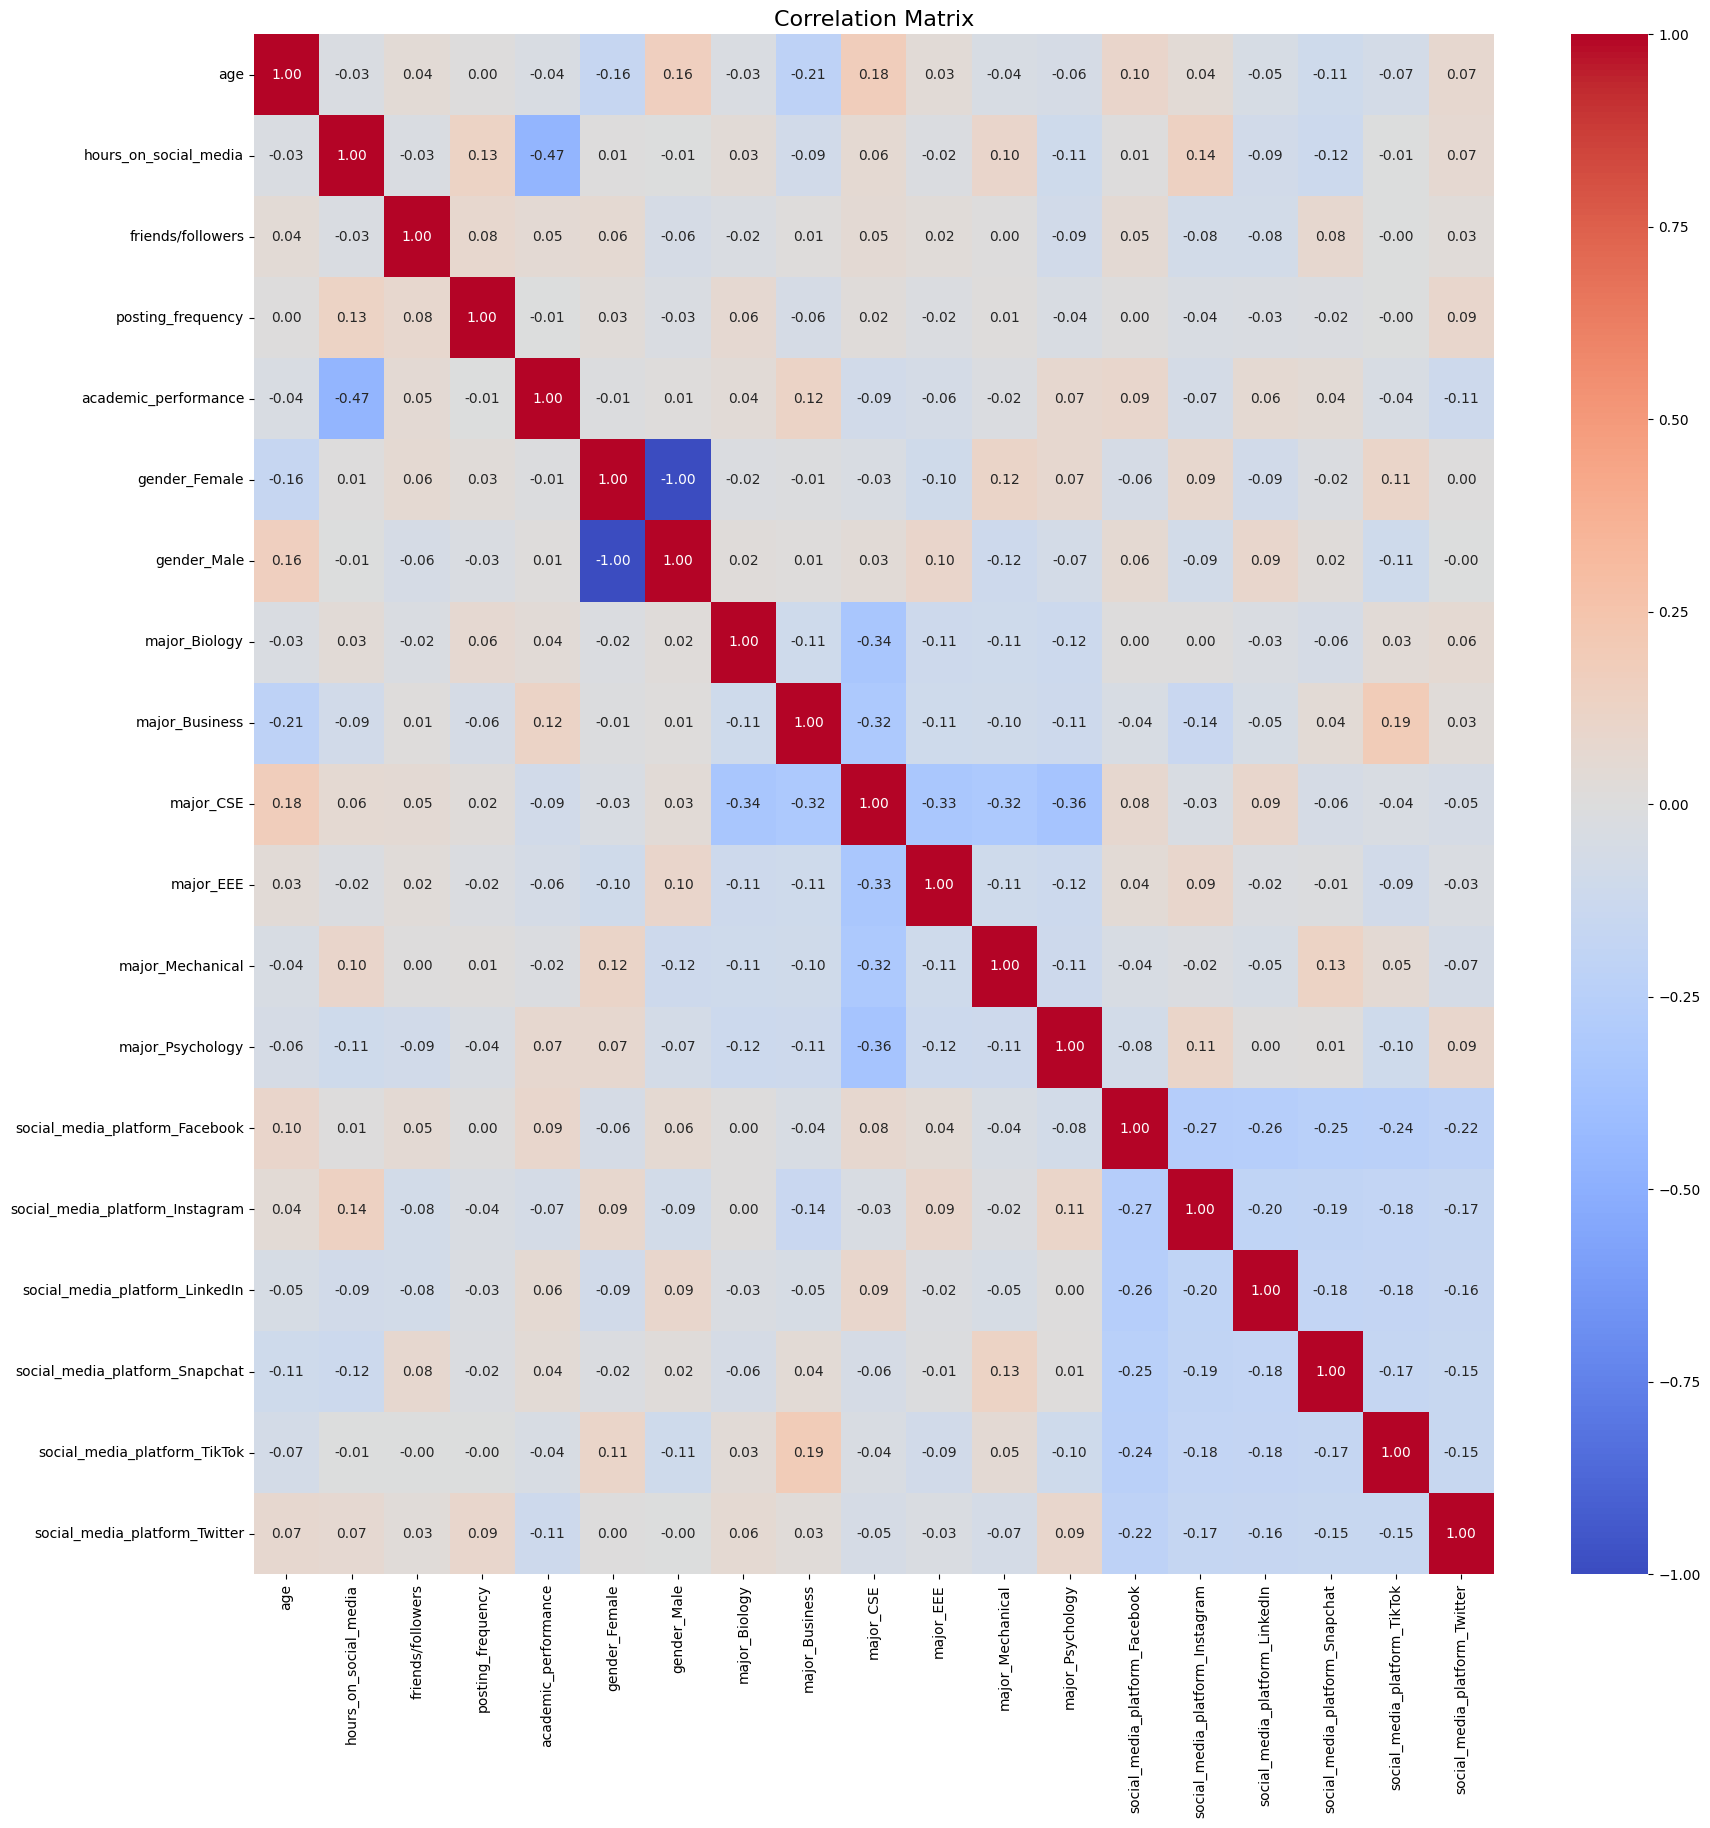

In [67]:
# Correlation Analysis of Numerical Variables
plt.figure(figsize=(20, 20))
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [68]:
df_copy.corr()['academic_performance'].sort_values(ascending=False)


academic_performance               1.000000
major_Business                     0.117709
social_media_platform_Facebook     0.090963
major_Psychology                   0.072475
social_media_platform_LinkedIn     0.056389
friends/followers                  0.048946
social_media_platform_Snapchat     0.044677
major_Biology                      0.038883
gender_Male                        0.007872
posting_frequency                 -0.007214
gender_Female                     -0.007872
major_Mechanical                  -0.016553
age                               -0.037935
social_media_platform_TikTok      -0.041544
major_EEE                         -0.064625
social_media_platform_Instagram   -0.069991
major_CSE                         -0.089364
social_media_platform_Twitter     -0.110836
hours_on_social_media             -0.467436
Name: academic_performance, dtype: float64

- Key Correlations Involving academic_performance:
  - academic_performance ↔ hours_on_social_media (-0.467): Strong negative correlation. Higher social media usage significantly lowers academic performance.
  - academic_performance ↔ posting_frequency (-0.007): Negligible negative correlation. Posting frequency has no notable impact on academic performance.
  - academic_performance ↔ social_media_platform_LinkedIn (0.056): Very weak positive correlation. LinkedIn users may have slightly better academic outcomes.
  - academic_performance ↔ social_media_platform_Instagram (-0.070): Very weak negative correlation. Instagram usage shows minimal impact on academic performance.
  - academic_performance ↔ major_Business (0.117): Weak positive correlation.
  - academic_performance ↔ social_media_platform_Twitter (-0.110): weak negative correlation.
- Key Multicollinearities:
  - social_media_platform_Instagram ↔ social_media_platform_LinkedIn (-0.197): Weak negative correlation. Students active on Instagram are less likely to use LinkedIn.
  - social_media_platform_Snapchat ↔ social_media_platform_TikTok (-0.171): Weak negative correlation. Students using Snapchat are slightly less likely to use TikTok, indicating exclusivity in platform usage.
  - posting_frequency ↔ hours_on_social_media (0.127): Weak positive correlation. Students posting frequently tend to spend more time on social media, potentially influencing other variables indirectly.


# Summary of Analysis


## Outliers
- Outliers in the "Friends/Followers" column were identified but not removed for further analysis.

## Univariate Analysis
- **Hours on Social Media**:
  - Mechanical majors spend the most time (average: 5.6 hours), while Business majors spend the least (average: 2.45 hours).
- **Gender Distribution**:
  - The dataset is imbalanced: 58% male and 42% female.
  - No significant difference was found in hours spent on social media by gender; females spend slightly more (avg: 3.75 hours) compared to males (avg: 3.6 hours).
- **Social Media Platform Usage**:
  - Most popular platform: Facebook (used by 57 students).
  - Least popular platform: Twitter (used by 26 students).

## Bivariate Analysis
- **Academic Performance vs Friends/Followers**:
  - No strong indication of academic performance based on the number of friends/followers on social media.
- **Academic Performance vs Hours on Social Media**:
  - Strong negative correlation observed: more social media usage leads to lower academic performance.

## Multivariate Analysis
### Correlation Analysis
- **Key Correlations with Academic Performance**:
  - Hours on Social Media: -0.467 (strong negative correlation).
  - Posting Frequency: -0.007 (negligible impact).
  - LinkedIn Usage: Slight positive correlation (+0.056).
  - Instagram Usage: Slight negative correlation (-0.070).
- **Platform Exclusivity**:
  - Weak negative correlation between Instagram and LinkedIn usage (-0.197).
  - Weak negative correlation between Snapchat and TikTok usage (-0.171).


## Clustering Analysis

In [69]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### Kmeans Clustering

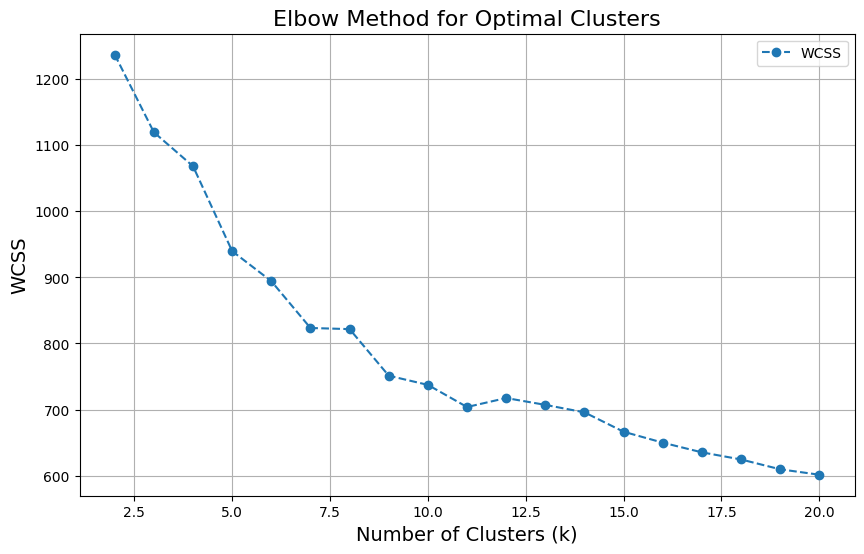

In [70]:
# Elbow method to determine the optimal number of clusters
inertia = []
silhouette_scores = []
k_values = range(2, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_copy)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_copy, kmeans.labels_))

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', label='WCSS')
plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.grid()
plt.legend()
plt.show()


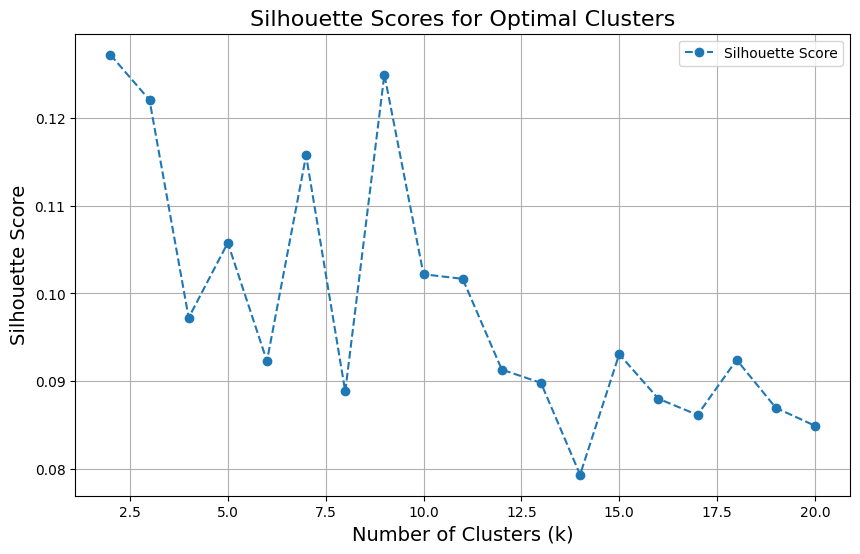

In [71]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.title('Silhouette Scores for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.grid()
plt.legend()
plt.show()

In [73]:
# Choose the optimal number of clusters based on the elbowa k=9 and silhouette method k=2
optimal_k = 9
optimal_k_considering_silhouette = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_copy['cluster'] = kmeans.fit_predict(df_copy)

# Print cluster centers
print("Cluster Centers:\n", pd.DataFrame(kmeans.cluster_centers_, columns=df_copy.columns[:-1]))


Cluster Centers:
         age  hours_on_social_media  friends/followers  posting_frequency  \
0 -0.746739              -1.121193          -0.231229          -1.187498   
1  0.268198               0.965249          -0.108414          -0.840476   
2 -1.309553               0.010295           0.015983           0.296155   
3  0.989172              -0.788228          -0.050670          -0.128356   
4  0.841146               0.666194          -0.177167          -0.020390   
5  0.832961              -0.279173           7.836228           0.157213   
6 -0.583039              -0.851814           0.120373           1.248206   
7  0.357843               1.067963          -0.253832           1.463263   
8 -0.901669               0.539129           0.060329          -0.217929   

   academic_performance  gender_Female   gender_Male  major_Biology  \
0              1.652174   5.217391e-01  4.782609e-01       0.086957   
1              0.870968   6.451613e-02  9.354839e-01       0.129032   
2       

In [74]:
# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_copy.drop(columns=['cluster']))
df_copy['pca_1'] = pca_result[:, 0]
df_copy['pca_2'] = pca_result[:, 1]

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each PCA component: {explained_variance}")
print(f"Total Variance Explained: {np.sum(explained_variance):.2f}")


Explained Variance by each PCA component: [0.18997262 0.1683655 ]
Total Variance Explained: 0.36


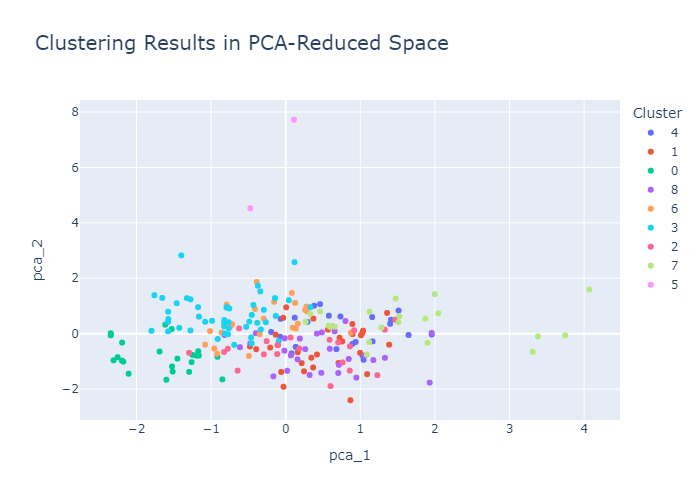

In [75]:
fig = px.scatter(df_copy, x='pca_1', y='pca_2', color=df_copy['cluster'].astype(str),
                 title="Clustering Results in PCA-Reduced Space",
                 labels={'color': 'Cluster'})
fig.update_layout(title_font_size=20, legend_title_font_size=14, legend_title_text='Cluster')

fig.show("png")

In [76]:
# Sort features by importance (higher deviation indicates more influence on clusters)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_copy.columns[:-3])
overall_mean = df_copy.mean()[:-3]
feature_contributions = cluster_centers.apply(lambda x: abs(x - overall_mean), axis=1).mean()
feature_importance = feature_contributions.sort_values(ascending=False)
print("Feature Importance (Based on Deviation from Overall Mean):")
print(feature_importance)


Feature Importance (Based on Deviation from Overall Mean):
friends/followers                  0.983803
age                                0.758925
hours_on_social_media              0.698804
posting_frequency                  0.617721
gender_Female                      0.391891
gender_Male                        0.391891
academic_performance               0.353690
major_CSE                          0.111036
social_media_platform_Facebook     0.098920
social_media_platform_Snapchat     0.092935
major_EEE                          0.090586
social_media_platform_Instagram    0.090082
major_Business                     0.073868
major_Psychology                   0.068416
social_media_platform_LinkedIn     0.064543
social_media_platform_Twitter      0.051950
social_media_platform_TikTok       0.049805
major_Mechanical                   0.045624
major_Biology                      0.039037
dtype: float64


In [77]:
from kneed import KneeLocator
kl=KneeLocator(range(2, 21), inertia, curve="convex", direction="decreasing")
kl.elbow

np.int64(9)

In [78]:
df_copy.drop(['cluster','pca_1','pca_2'],axis=1,inplace=True)

### KMeans Clustering for k=2 

In [79]:
optimal_k_considering_silhouette = 2
kmeans = KMeans(n_clusters=optimal_k_considering_silhouette, random_state=42)
df_copy['cluster'] = kmeans.fit_predict(df_copy)

print("Cluster Centers:\n", pd.DataFrame(kmeans.cluster_centers_, columns=df_copy.columns[:-1]))


Cluster Centers:
         age  hours_on_social_media  friends/followers  posting_frequency  \
0  0.052054              -0.837696           0.097826          -0.004885   
1 -0.050647               0.815056          -0.095182           0.004753   

   academic_performance  gender_Female  gender_Male  major_Biology  \
0              1.537037       0.379630     0.620370       0.111111   
1              0.747748       0.459459     0.540541       0.099099   

   major_Business  major_CSE  major_EEE  major_Mechanical  major_Psychology  \
0        0.111111   0.481481   0.101852          0.064815          0.129630   
1        0.072072   0.513514   0.099099          0.117117          0.099099   

   social_media_platform_Facebook  social_media_platform_Instagram  \
0                        0.305556                         0.120370   
1                        0.216216                         0.216216   

   social_media_platform_LinkedIn  social_media_platform_Snapchat  \
0                       

In [80]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_copy.drop(columns=['cluster']))
df_copy['pca_1'] = pca_result[:, 0]
df_copy['pca_2'] = pca_result[:, 1]

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each PCA component: {explained_variance}")
print(f"Total Variance Explained: {np.sum(explained_variance):.2f}")

Explained Variance by each PCA component: [0.18997262 0.1683655 ]
Total Variance Explained: 0.36


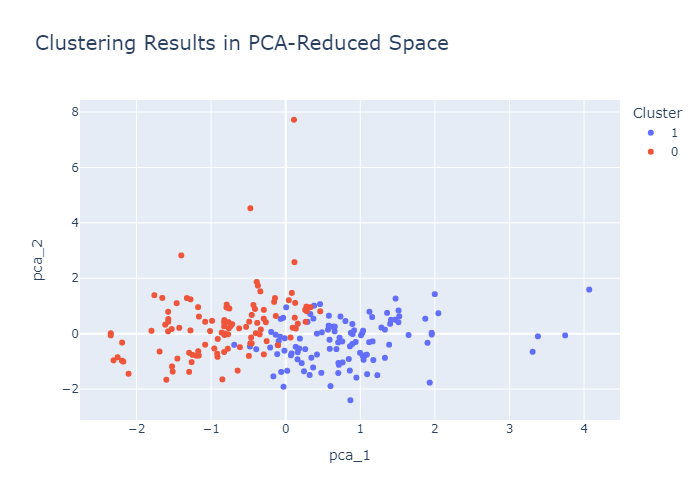

In [81]:
fig = px.scatter(df_copy, x='pca_1', y='pca_2', color=df_copy['cluster'].astype(str),
                 title="Clustering Results in PCA-Reduced Space",
                 labels={'color': 'Cluster'})
fig.update_layout(title_font_size=20, legend_title_font_size=14, legend_title_text='Cluster')
fig.show("png")


In [82]:
# Sort features by importance (higher deviation indicates more influence on clusters)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_copy.columns[:-3])
overall_mean = df_copy.mean()[:-3]
feature_contributions = cluster_centers.apply(lambda x: abs(x - overall_mean), axis=1).mean()
feature_importance = feature_contributions.sort_values(ascending=False)
print("Feature Importance (Based on Deviation from Overall Mean):")
print(feature_importance)

Feature Importance (Based on Deviation from Overall Mean):
hours_on_social_media              0.826376
academic_performance               0.394645
friends/followers                  0.096504
age                                0.051351
social_media_platform_Instagram    0.047923
social_media_platform_Facebook     0.044670
gender_Male                        0.039915
gender_Female                      0.039915
social_media_platform_LinkedIn     0.034159
social_media_platform_TikTok       0.030030
major_Mechanical                   0.026151
social_media_platform_Twitter      0.025776
social_media_platform_Snapchat     0.024900
major_Business                     0.019520
major_CSE                          0.016016
major_Psychology                   0.015265
major_Biology                      0.006006
posting_frequency                  0.004819
major_EEE                          0.001376
dtype: float64


### PCA in 3 dimensions

In [83]:
df_copy.drop(['cluster','pca_1','pca_2'],axis=1,inplace=True)

In [84]:
optimal_k_considering_silhouette = 2
kmeans = KMeans(n_clusters=optimal_k_considering_silhouette, random_state=42)
df_copy['cluster'] = kmeans.fit_predict(df_copy)

print("Cluster Centers:\n", pd.DataFrame(kmeans.cluster_centers_, columns=df_copy.columns[:-1]))


Cluster Centers:
         age  hours_on_social_media  friends/followers  posting_frequency  \
0  0.052054              -0.837696           0.097826          -0.004885   
1 -0.050647               0.815056          -0.095182           0.004753   

   academic_performance  gender_Female  gender_Male  major_Biology  \
0              1.537037       0.379630     0.620370       0.111111   
1              0.747748       0.459459     0.540541       0.099099   

   major_Business  major_CSE  major_EEE  major_Mechanical  major_Psychology  \
0        0.111111   0.481481   0.101852          0.064815          0.129630   
1        0.072072   0.513514   0.099099          0.117117          0.099099   

   social_media_platform_Facebook  social_media_platform_Instagram  \
0                        0.305556                         0.120370   
1                        0.216216                         0.216216   

   social_media_platform_LinkedIn  social_media_platform_Snapchat  \
0                       

In [85]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_copy.drop(columns=['cluster']))
df_copy['pca_1'] = pca_result[:, 0]
df_copy['pca_2'] = pca_result[:, 1]
df_copy['pca_3'] = pca_result[:, 2]

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each PCA component: {explained_variance}")
print(f"Total Variance Explained: {np.sum(explained_variance):.2f}")

Explained Variance by each PCA component: [0.18997262 0.1683655  0.15836148]
Total Variance Explained: 0.52


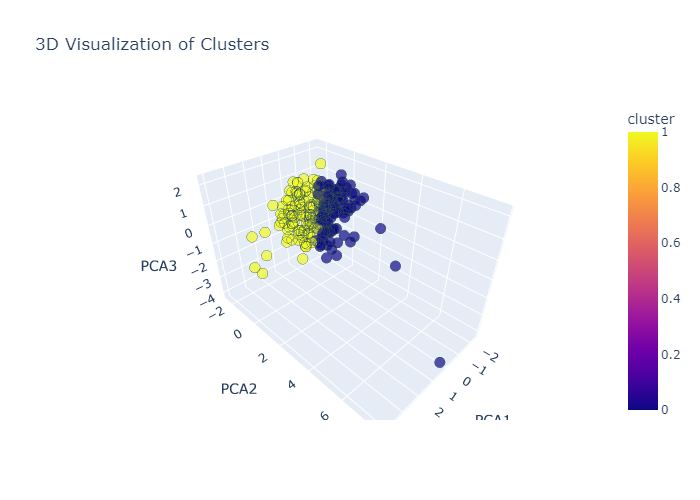

In [88]:
fig = px.scatter_3d( df_copy, x='pca_1', y='pca_2', z='pca_3', color='cluster', title='3D Visualization of Clusters',
    labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2', 'PCA3': 'Principal Component 3'}, opacity=0.7)

fig.update_traces(marker=dict(size=6, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(scene=dict(xaxis_title='PCA1', yaxis_title='PCA2', zaxis_title='PCA3'))

fig.show("png")


## Analysis and Insights

**Comparison of Clustering Metrics**

- **Elbow Method for Optimal k (Inertia Analysis):**
    - Inertia decreases significantly up to k=9 based on the Elbow Method, as determined using KneeLocator. Beyond this point, the rate of decrease in inertia becomes less prominent. Trends are : Steep Decline in Inertia (k=2 to k=9), Diminishing Returns After k=9, Irregular Behavior Around k=11 and k=13, Flat Deline (k=14 to 20).
- **Silhouette Scores:**
    - Silhouette scores across clusters are relatively low overall, indicating a lack of clear separation between clusters The maximum silhouette score occurs at k=2, suggesting a better-defined cluster structure when dividing the dataset into two clusters. However, the score at k=9 is also moderately high compared to other values, implying that while it might not have the best-defined clusters, it aligns with the optimal inertia-based k.
- **PCA Variance Explanation:**
    - The first two PCA components explain 36% of the total variance in the data. While this is not very high, it provides a starting point for visualization and dimensionality reduction.


**Feature Importance Insights**

- **For k=9:**
    - **Dominant Features:**
        - friends/followers and age are the most significant features.
        - hours_on_social_media and posting_frequency are also key contributors.
- **For k=2:**
    - **Dominant Features:**
        - hours_on_social_media emerges as the most influential feature.
        - academic_performance is the second most important feature.

**Clustering Insights**

- **k=9 Clusters:**
    - Divides the dataset into finer groups, capturing features like friends/followers and age.
    - The relatively higher silhouette score for k=9 compared to neighboring values suggests moderate cluster cohesion and separation.
- **k=2 Clusters:**
    - Provides a broader segmentation of the dataset, highlighting significant divides based on hours_on_social_media and academic_performance.
- **Optimal Number of Clusters:**
    - While the elbow method suggests k=9, silhouette scores recommend k=2. The choice between these depends on whether finer segmentation or broad categorization is desired.
- **3d Plotting for k=2**    
    - The clusters (colored blue and yellow) show a reasonable separation in the 3D PCA space. However, some overlap is seen which means that there are  same characteristics between the two groups.

